# Distributed Datasets Similarity Assessment via Convex Hulls

## Todo

- [x] Generate the different partitions (`iid_full`, [...] `kmeans_keep_1`) for seed 1138.
- [x] Load the different partitions plus the 4 datasets.
- [x] Make the preprocessing pipeline  -> just use either pickle or `eiffel.load_data`.
- [ ] Optionnaly reduce the dimensionality of the datasets (PCA).
- [ ] Find how to compute the convex hulls for a set of points in nD.
- [ ] Build a similarity matrix for each partitioning scheme plus the 4 datasets.
- [ ] Look at the correlation between cosine similarity between models and the convex hulls similarity.

## Datasets and Partitions

In [5]:
import pickle
from pathlib import Path

import pandas as pd
from eiffel.datasets.nfv2 import NFV2Dataset


def eiffel_dataset_to_df(dataset: NFV2Dataset) -> pd.DataFrame:
    """Rebuild a DataFrame from a NFV2Dataset object."""
    x, _, m = dataset.to_tuple()
    df = pd.concat([x, m], axis=1)
    return df


dir = Path("../../data/nfv2/partitions/cicids/")
f = dir / "iid_full/shard_0.pkl"
df = eiffel_dataset_to_df(pickle.load(f.open("rb")))
df = df.dropna(axis=1)
df = df.drop(
    columns=[
        "IPV4_SRC_ADDR",
        "IPV4_DST_ADDR",
        "L4_SRC_PORT",
        "L4_DST_PORT",
        "Label",
        "Attack",
        "FTP_COMMAND_RET_CODE",
    ]
)
# standard scaling
df = (df - df.mean(axis=0)) / df.std(axis=0)

Text(0, 0.5, 'Cumulative explained variance')

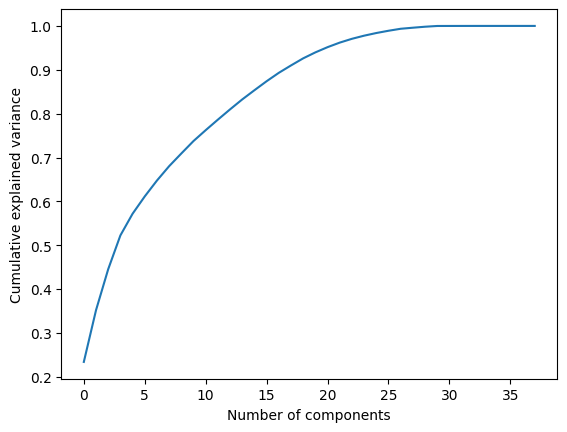

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# PCA to reduce dimensionality
pca = PCA()
pca.fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")